In [1]:
'''
Fetal Health
    1 - Normal
    2 - Suspect
    3 - Pathological
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier
import os

os.chdir("C:/Users/memdp/python_code/Datasets")

df = pd.read_csv("fetal_health.csv")

df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<AxesSubplot:>

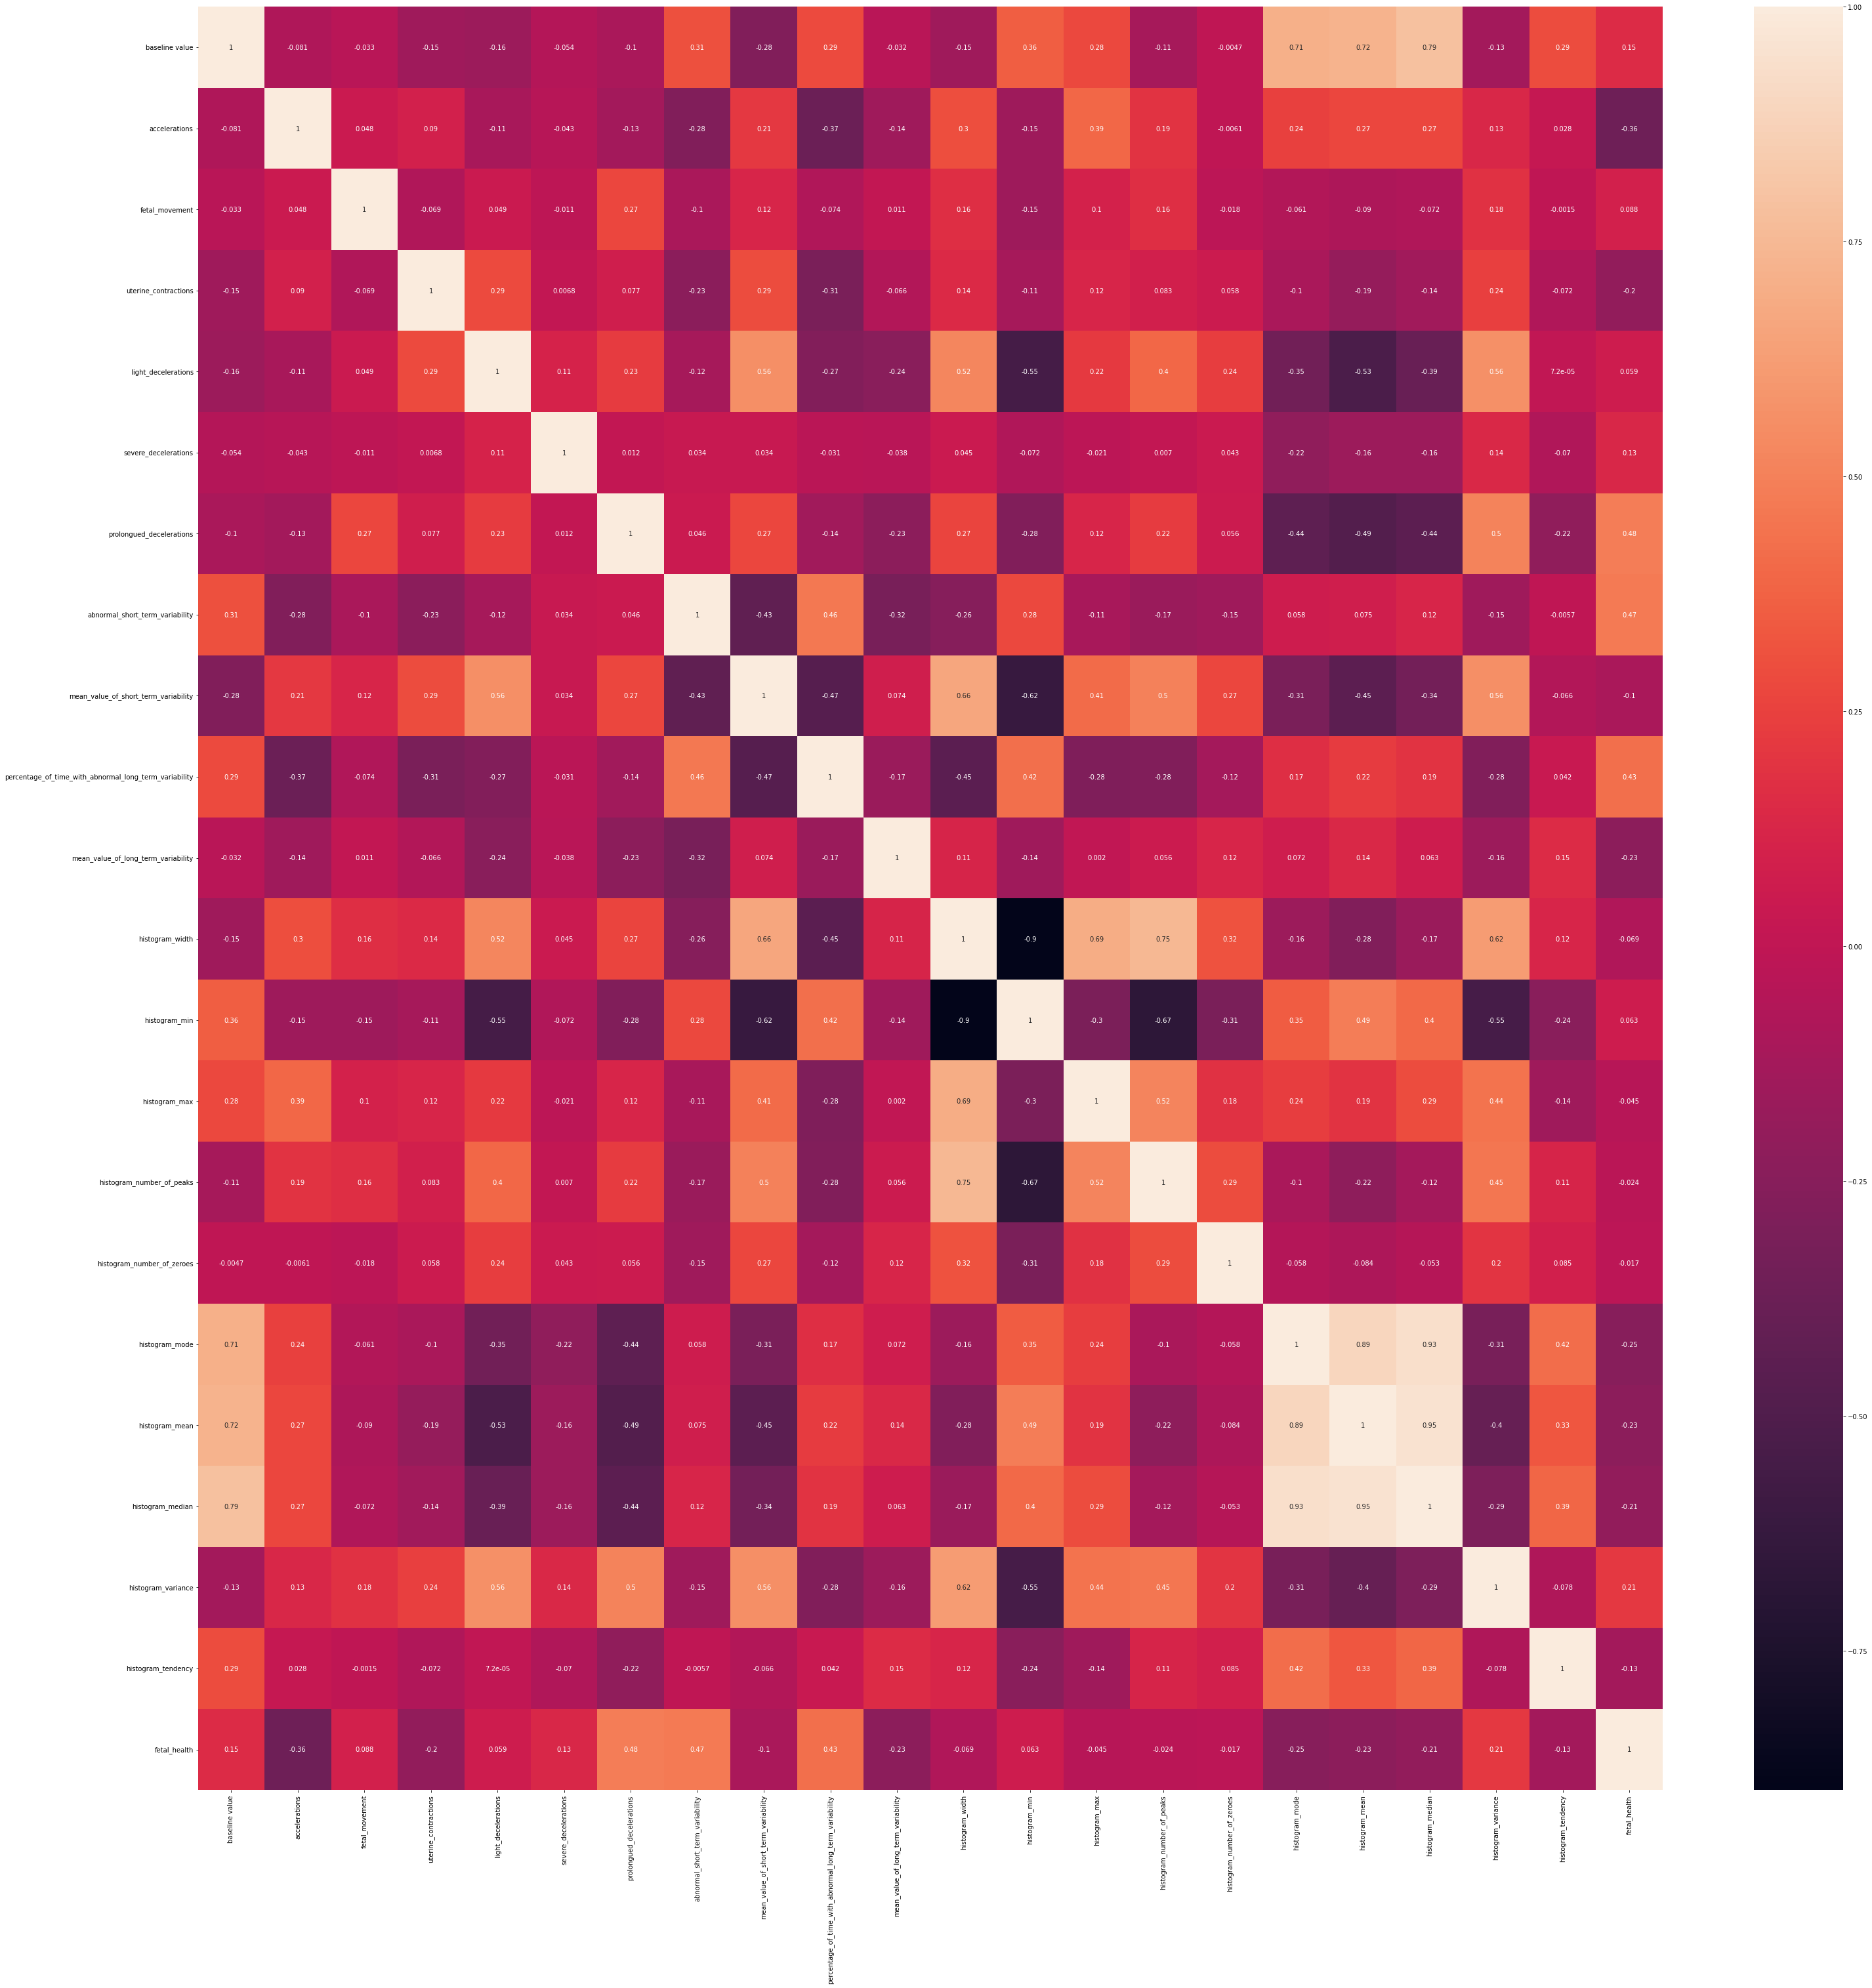

In [2]:
corr_matrix = df.corr()

plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)

[None, None]

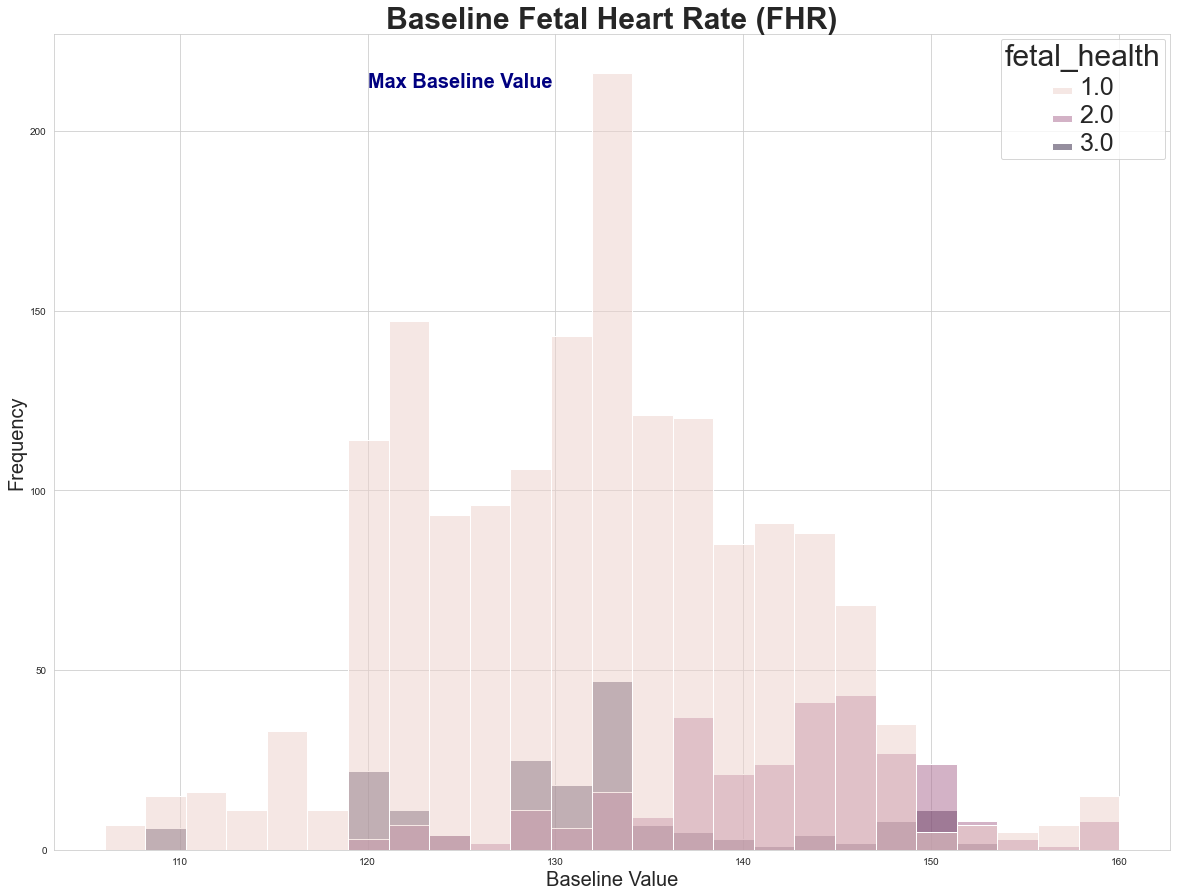

In [3]:
'''
According to Johns Hopkins Medicine
    The average fetal heart rate is [110, 160] bpm
    
        There are a few things that can make the results of the
        fetal hear rate monitoring less accurate, which include
        
            Obesity in mother
            Position of the baby or mother
            Too much amniotic fluid
            Cervix is not dilated or the amniotic sac is not broken
'''
sns.set_style("whitegrid")
fig = plt.figure(figsize=(20,15))
ax = plt.subplot()
plot = sns.histplot(data=df, x="baseline value", hue="fetal_health")
ax.set_title("Baseline Fetal Heart Rate (FHR)", fontsize=30, fontweight="bold")
ax.set_xlabel("Baseline Value", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)
ax.text(120, 212, "Max Baseline Value", fontsize=20, color="navy", fontweight="bold")
plt.setp(ax.get_legend().get_texts(), fontsize=25)
plt.setp(ax.get_legend().get_title(), fontsize=30)

In [4]:
"""
Attaining the values in the baseline range between 132 and 133
This will give the frequency of  MEAN Baseline values.

"""
count=0
for i in df["baseline value"].between(132,133, inclusive="both"):
    if i == True:
        count+=1
print(count)

212


<AxesSubplot:xlabel='accelerations', ylabel='Count'>

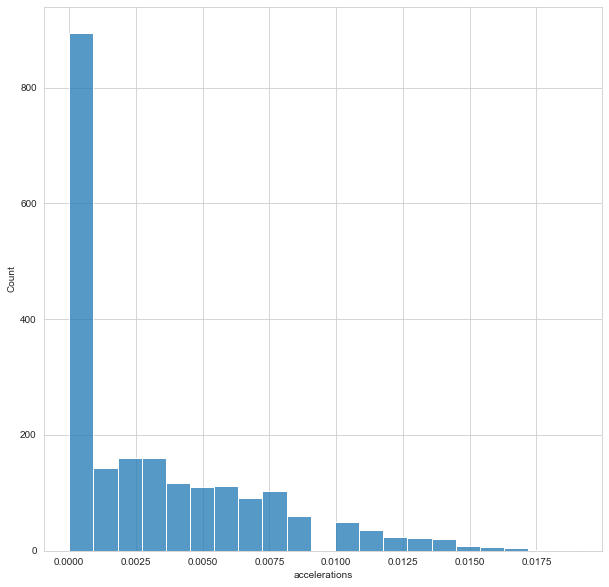

In [5]:
plt.figure(figsize=(10,10))
sns.histplot(df.accelerations)

<AxesSubplot:xlabel='fetal_movement', ylabel='Count'>

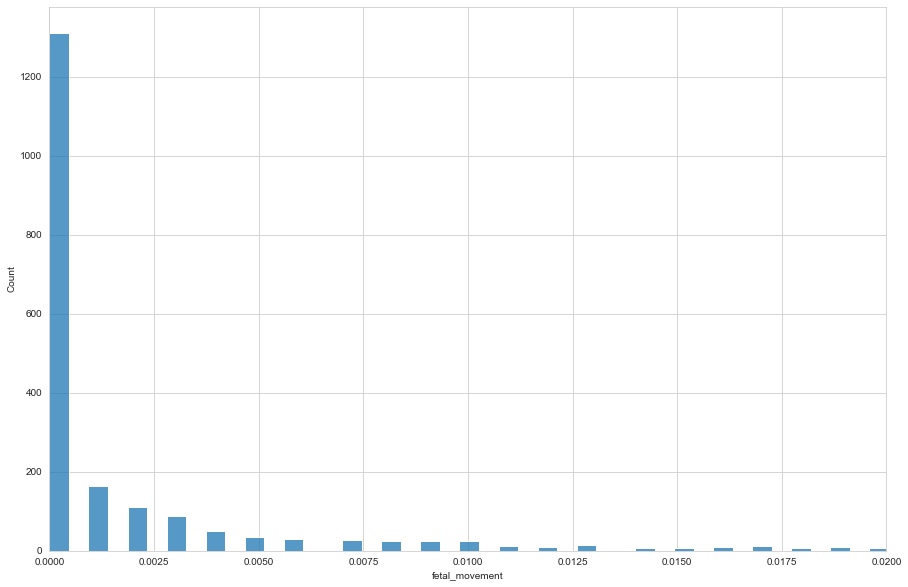

In [6]:
# Since most observations are between 0 - 0.02
# lets change the domain of x
plt.figure(figsize=(15,10))
plt.xlim(0, 0.02)
sns.histplot(df.fetal_movement)

In [7]:
response = df.fetal_health
predictors = df.drop(["fetal_health"], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.3, random_state=1)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.9137931034482759


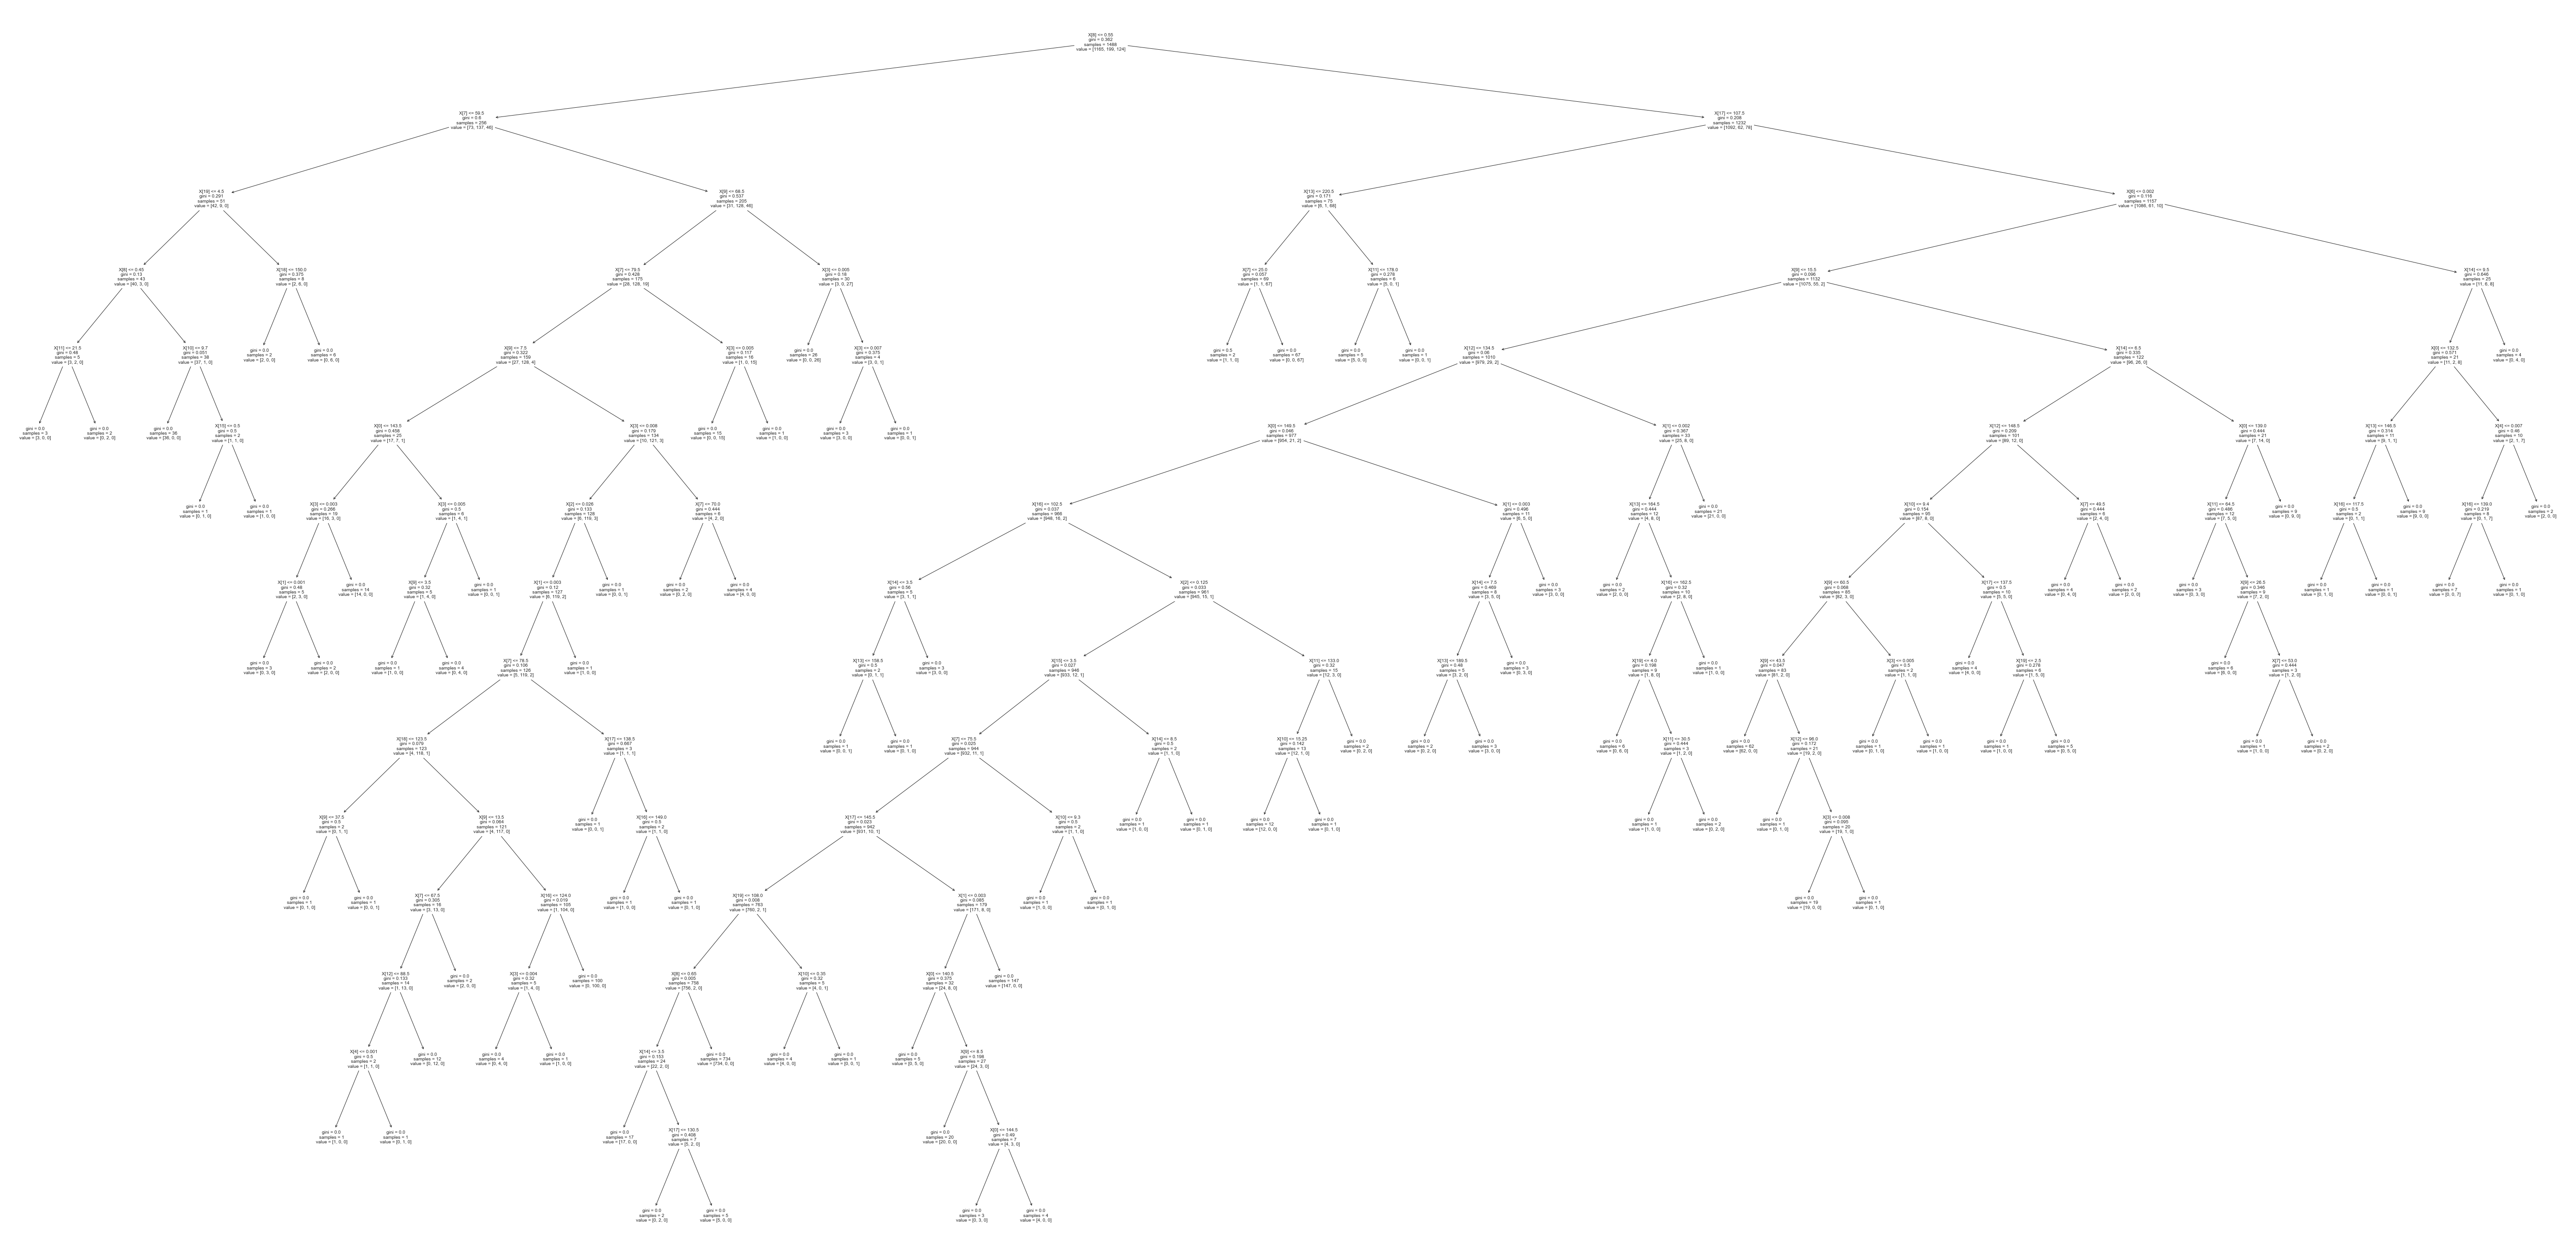

In [10]:
'''
IMPORTANT

The index for plot_tree starts from 1, not from zero!!!

X[1] -> baseline value
X[2] -> accelerations
X[3] -> fetal_movement
X[4] -> uterine_contractions
X[5] -> light_decelerations
X[6] -> severe_decelerations
X[7] -> prolongued_decelerations
X[8] -> abnormal_short_term_variability
X[9] -> mean_value_of_short_term_variability
X[10] -> percentage_of_time_with_abnormal_long_term_variability
X[11] -> mean_value_of_long_term_variability
X[12] -> histogram_width
X[13] -> histogram_min
X[14] -> histogram_max
X[15] -> histogram_number_of_peaks
X[16] -> histogram_number_of_zeroes
X[17] -> histogram_mode
X[18] -> histogram_mean
X[19] -> histogram_median
X[20] -> histogram_variance
X[21] -> histogram_tendency
'''
plt.figure(figsize=(100,50))
tree.plot_tree(clf, fontsize=10);
plt.savefig('C:/Users/memdp/python_code/Figures/predictions_high_dpi', dpi=100)

In [11]:
"""
Multicollinearity is not an issue in decision tree
classifiers.
"""

predictors_mod = df.iloc[:, :8]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred_decision = clf.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_decision)}')

Accuracy: 0.9043887147335423


In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_decision)

cm_df = pd.DataFrame(cm, index = ['Normal', 'Suspect', 'Pathological'],
                     columns = ['Normal', 'Suspect', 'Pathological'])
cm_df

,Normal,Suspect,Pathological
Normal,466,20,4
Suspect,29,64,3
Pathological,1,4,47


In [13]:
# With Bagging accuracy improves by roughly 2.5%
clf = BaggingClassifier(n_estimators=10, random_state=1)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.9341692789968652


In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index = ['Normal', 'Suspect', 'Pathological'],
                     columns = ['Normal', 'Suspect', 'Pathological'])
cm_df

,Normal,Suspect,Pathological
Normal,484,4,2
Suspect,27,66,3
Pathological,3,3,46


Text(0.5, 70.0, 'Predicted Values')

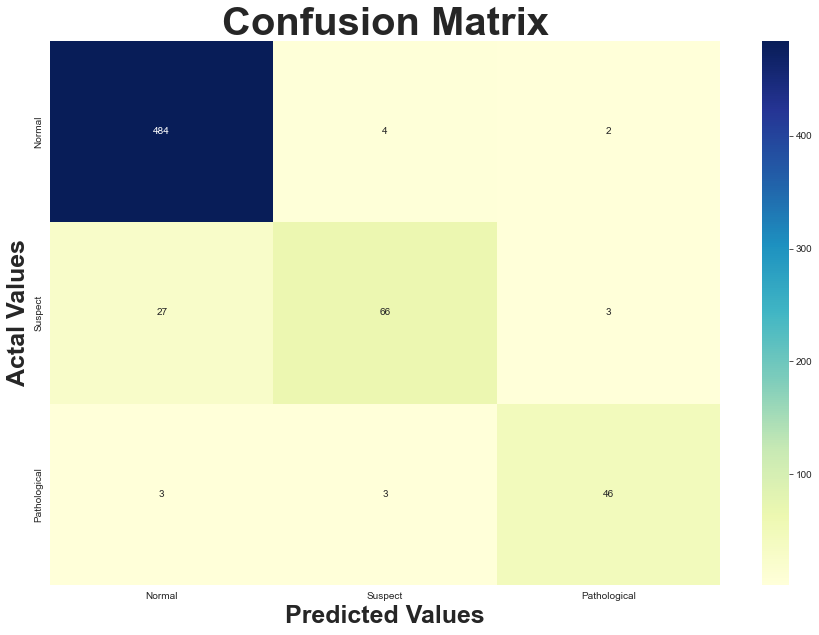

In [15]:
'''
Most of the observations recorded wrong are those which
are suspect that are reported as normal.
'''
plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix', fontsize=40, fontweight="bold")
plt.ylabel('Actal Values', fontsize=25, fontweight="bold")
plt.xlabel('Predicted Values', fontsize=25, fontweight="bold")


In [16]:
"""
MACRO:
Calculate metrics for each label, and find their unweighted mean.
This does not take label imbalance into account.

* Since, we're dealing with an imbalanced datset where all classes
are equally important, we'll use a macro average, as it treats all
classes equally.*

"""

scores = metrics.precision_recall_fscore_support(y_test, y_pred, average="macro")

print("Average : Macro\n")
print(f"Precision:    {scores[0]}")
print(f"Recall score: {scores[1]}")
print(f"F1 score:     {scores[2]}")

Average : Macro

Precision:    0.9159015381999858
Recall score: 0.8532901622187335
F1 score:     0.8794707995157877


In [17]:
"""
WEIGHTED:
Calculate metrics for each label, and find their
average weighted by support (the number of true instances for each label).
This alters ‘macro’ to account for label imbalance;
it can result in an F-score that is not between precision and recall.

"""

"""
MICRO:
Calculate metrics globally by counting the total true positives,
false negatives and false positives.

"""

scores = metrics.recall_score(y_test, y_pred, average="micro")

print("Average : Micro\n")
print(f"Precision=Recall=F1_score:    {scores}\n\n")
scores = metrics.precision_recall_fscore_support(y_test, y_pred, average="weighted")

print("Average : Weighted\n")
print(f"Precision:    {scores[0]}")
print(f"Recall score: {scores[1]}")
print(f"F1 score:     {scores[2]}")

Average : Micro

Precision=Recall=F1_score:    0.9341692789968652


Average : Weighted

Precision:    0.9327543253015291
Recall score: 0.9341692789968652
F1 score:     0.9308136823619431
